<font size="6">Hotel Booking Cancellation Prediction</font>

This is an improved project of hotel booking cancellation prediction using all of the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Background

<div style="text-align: justify">
Let's say that we have a hotel business to run. Since it is a business that revolve around service, customer satisfaction is the most important factor that indicates our success and future prospect of the business. Good experience will lead to good reviews, it will help us in developing loyal customer and searching for new customers. Increase in customers drives most businesses, it will lead to increase in revenue and business growth, that we can increase the quality of service and also expand our business. It is basically a snowball effect.
</div>

<div style="text-align: justify">
First impressions are crucial in business because it's a human nature to make judgment about someone in their first meet. Making a strong first impression will help the business develop customer relationships and sales. In hotel business, preparing for the arrival of the customers is important to develop a strong first impression. However, how does the hotel management distinguish between customers that will come or not based on their characteristics in booking application?
</div>

<div style="text-align: justify">
In this project, I will aid the hotel management to predict which customers that will cancel their booking based on their booking application characteristics. With this predictive machine learning model, it will lead to cost-efficiency of the hotel management in preparing the customers arrival and increase in customers satisfaction based on the strong first impression provided.
</div>

# Dataset Information

<div style="text-align: justify">
Dataset used in this project was acquired from <a href="https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand" title="Hotel Booking Demand">Kaggle</a> which was originated from the publication of <a href="https://www.sciencedirect.com/science/article/pii/S2352340918315191" title="Hotel Booking Demand Datasets">Antonio <em>et al.</em> (2019)</a>. Data were obtained from 2 hotels which are located in Portugal: a resort hotel at the resort region of Algarve and a city hotel at the city of Lisbon. Dataset initially consists of 119,390 rows with 32 columns.
</div>

In [2]:
hotel= pd.read_csv('hotel_bookings.csv')
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

<div style="text-align: justify">
First, I selected the features to be explored based on its column definition/description that can be seen in the paper. To make it easy for me to further explore the features, I classified them manually using their purposes.
</div>

In [3]:
hotel=hotel[['is_canceled', # Dependent variables, label
             'hotel', # For stratification purpose
             'adults','babies','children', # Number of customers
             'country','is_repeated_guest','meal','reserved_room_type','deposit_type', # Customer characteristics
             'required_car_parking_spaces','total_of_special_requests', # Request
             'market_segment','distribution_channel', # Marketing-related features
             'customer_type','previous_bookings_not_canceled','previous_cancellations','booking_changes','days_in_waiting_list' # Booking-related features
             ]]

## Detailed Columns Description

Since there are unfamiliar abbreviations in the dataset unique values, thus I present this detailed description of the columns selected for the model:

1. is_canceled: Value indicating if the booking was canceled (1) or not (0);
2. adults: Number of adults;
3. babies: Number of babies;
4. children: Number of children;
5. country: Country of origin;
6. is_repeated_guest: Value indicating if the booking name was from a repeated guest (1) or not (0);
7. meal: Type of meal booked:
    - Undefined or SC: No meal package,
    - BB: Bed and Breakfast,
    - HB: Half Board (Breakfast and one other meal, usually Dinner),
    - FB: Full Board (Breakfast, Lunch, and Dinner);
8. reserved_room_type: Code of room type reserved. Code is presented instead of designation for anonymity reasons;
9. deposit_type: Indication on if the customer made a deposit to guarantee the booking:
    - No Deposit: No deposit was made,
    - Non Refund: A deposit was made in the value of the total stay cost,
    - Refundable: A deposit was made with a value under the total cost of stay;
10. required_car_parking_spaces: Number of car parking spaces required by the customer;
11. total_of_special_requests: Number of special requests made by the customer (e.g. twin bed or high floor);
12. market_segment: Market segment designation:
    - TA: Travel Agents,
    - TO: Tour Operators;
13. distribution_channel: Booking distribution channel:
    - TA: Travel Agents,
    - TO: Tour Operators;
14. customer_type: Type of booking:
    - Contract: When the booking has an allotment or other type of contract associated to it,
    - Group: When the booking is associated to a group,
    - Transient: When the booking is not part of a group or contract, and is not associated to other transient booking,
    - Transient-Party: When the booking is transient, but is associated to at least other transient booking;
15. previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking;
16. previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking;
17. booking_changes: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation;
18. days_in_waiting_list: Number of days the booking was in the waiting list before it was confirmed to the customer.

In [4]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   hotel                           119390 non-null  object 
 2   adults                          119390 non-null  int64  
 3   babies                          119390 non-null  int64  
 4   children                        119386 non-null  float64
 5   country                         118902 non-null  object 
 6   is_repeated_guest               119390 non-null  int64  
 7   meal                            119390 non-null  object 
 8   reserved_room_type              119390 non-null  object 
 9   deposit_type                    119390 non-null  object 
 10  required_car_parking_spaces     119390 non-null  int64  
 11  total_of_special_requests       119390 non-null  int64  
 12  market_segment  

# Data Cleaning

Let's take a brief look at the columns distribution to identify missing values and anomalies in the dataset.

In [5]:
hotel.describe()

,is_canceled,adults,babies,children,is_repeated_guest,required_car_parking_spaces,total_of_special_requests,previous_bookings_not_canceled,previous_cancellations,booking_changes,days_in_waiting_list
count,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,1.856403,0.007949,0.103890,0.031912,0.062518,0.571363,0.137097,0.087118,0.221124,2.321149
std,0.482918,0.579261,0.097436,0.398561,0.175767,0.245291,0.792798,1.497437,0.844336,0.652306,17.594721
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,55.000000,10.000000,10.000000,1.000000,8.000000,5.000000,72.000000,26.000000,21.000000,391.000000


In [6]:
hotel.describe(include='object')

,hotel,country,meal,reserved_room_type,deposit_type,market_segment,distribution_channel,customer_type
count,119390,118902,119390,119390,119390,119390,119390,119390
unique,2,177,5,10,3,8,5,4
top,City Hotel,PRT,BB,A,No Deposit,Online TA,TA/TO,Transient
freq,79330,48590,92310,85994,104641,56477,97870,89613


## Treating Anomalies

From the table above, we can see several anomalies within the dataset. Let's check them out.

### Max Value of Adults, Babies, Children

In [7]:
# Checking data with adults more than 4
hotel[hotel['adults']>4][['adults','is_canceled']]

,adults,is_canceled
1539,40,1
1587,26,1
1643,50,1
1752,26,1
1884,26,1
1917,27,1
1962,27,1
2003,26,1
2164,26,1
2173,55,1


<div style="text-align: justify">
From the table above, we can see that all data with number of adults more than 4 resulting in booking cancel. It is indicating mis-input of booking data. Thus, they actually are not anomalies. We can easily distinguish the booking that will canceled from abnormal amount of adults.
</div>

In [8]:
hotel[hotel['babies']>2]

,is_canceled,hotel,adults,babies,children,country,is_repeated_guest,meal,reserved_room_type,deposit_type,required_car_parking_spaces,total_of_special_requests,market_segment,distribution_channel,customer_type,previous_bookings_not_canceled,previous_cancellations,booking_changes,days_in_waiting_list
46619,0,City Hotel,2,10,0.0,PRT,0,BB,D,No Deposit,0,1,Online TA,TA/TO,Transient,0,0,1,0
78656,0,City Hotel,1,9,0.0,GBR,0,BB,A,No Deposit,0,0,Corporate,Corporate,Transient-Party,0,0,1,0


<div style="text-align: justify">
Looking at the market segment, it is most unlikely that the corporate segment customers will bring babies and children to their business trip. Let's check this assumption:
</div>

In [9]:
CBC = hotel[(hotel['market_segment']=='Corporate')&((hotel['babies']>0)|(hotel['children']>0))]['is_canceled'].count()
CWBC = hotel[(hotel['market_segment']=='Corporate')]['is_canceled'].count()
print('Data of Corporate Segment with Babies/Children:',CBC)
print('Data of Corporate Segment without Babies/Children:',CWBC)
print('Percentage of Data with Babies/Children in Corporate Segment:',round((CBC/CWBC)*100,2),'%')

Data of Corporate Segment with Babies/Children: 50
Data of Corporate Segment without Babies/Children: 5295
Percentage of Data with Babies/Children in Corporate Segment: 0.94 %


Since they are only minority of data, let's change the amount of babies and children in corporate sector to be 0.

In [10]:
index=hotel[(hotel['market_segment']=='Corporate')&((hotel['babies']>0)|(hotel['children']>0))].index
hotel.loc[index,'babies']=0
hotel.loc[index,'children']=0

In [11]:
hotel[(hotel['market_segment']=='Corporate')&((hotel['babies']>0)|(hotel['children']>0))]['is_canceled'].count()

0

In [12]:
hotel[(hotel['babies']>2)|(hotel['children']>3)]

,is_canceled,hotel,adults,babies,children,country,is_repeated_guest,meal,reserved_room_type,deposit_type,required_car_parking_spaces,total_of_special_requests,market_segment,distribution_channel,customer_type,previous_bookings_not_canceled,previous_cancellations,booking_changes,days_in_waiting_list
328,1,Resort Hotel,2,0,10.0,PRT,0,BB,D,No Deposit,0,1,Offline TA/TO,TA/TO,Contract,0,0,2,0
46619,0,City Hotel,2,10,0.0,PRT,0,BB,D,No Deposit,0,1,Online TA,TA/TO,Transient,0,0,1,0


Since the dataset didn't have any data that will support the assumption that both of these data are anomalies, then I will consider it as valid data.

### Min Value of Adults

<div style="text-align: justify">
It is most unlikely that the customer only consist of children and/or babies, or when the booking didn't specify the number of customers with 0 adults, babies, and children.
</div>

In [13]:
hotel[hotel['adults']==0]['is_canceled'].value_counts() # Total data with 0 adults = 403

0    294
1    109
Name: is_canceled, dtype: int64

<div style="text-align: justify">
We have several potential columns that will help us determining the total number of adults. Based on logic, customer_type, market_segment, and reserved_room_type may have association to the total number of adults in booking application. Customer type and market segment of groups may have connection to higher number of adults, while room type may reflect the size of the room that will also indicates the number of adults in the room.
</div>

In [14]:
hotel[(hotel['adults']>0)&(hotel['adults']<=4)].groupby('reserved_room_type')['adults'].describe()

,count,mean,std,min,25%,50%,75%,max
reserved_room_type,,,,,,,,
A,85851.0,1.780119,0.450410,1.0,2.0,2.0,2.0,4.0
B,907.0,1.934950,0.280259,1.0,2.0,2.0,2.0,3.0
C,931.0,2.041890,0.378688,1.0,2.0,2.0,2.0,4.0
D,19176.0,2.089539,0.519415,1.0,2.0,2.0,2.0,4.0
E,6516.0,1.983579,0.425085,1.0,2.0,2.0,2.0,4.0
F,2892.0,1.995851,0.319952,1.0,2.0,2.0,2.0,4.0
G,2091.0,2.080823,0.436022,1.0,2.0,2.0,2.0,4.0
H,601.0,2.712146,0.543448,1.0,2.0,3.0,3.0,4.0
L,6.0,2.166667,0.983192,1.0,2.0,2.0,2.0,4.0


In [15]:
hotel[(hotel['adults']>0)&(hotel['adults']<=4)].groupby('customer_type')['adults'].describe()

,count,mean,std,min,25%,50%,75%,max
customer_type,,,,,,,,
Contract,4071.0,1.921887,0.317840,1.0,2.0,2.0,2.0,3.0
Group,557.0,1.721724,0.512202,1.0,1.0,2.0,2.0,3.0
Transient,89337.0,1.892620,0.473755,1.0,2.0,2.0,2.0,4.0
Transient-Party,25006.0,1.734664,0.490277,1.0,1.0,2.0,2.0,4.0


In [16]:
hotel[(hotel['adults']>0)&(hotel['adults']<=4)].groupby('market_segment')['adults'].describe()

,count,mean,std,min,25%,50%,75%,max
market_segment,,,,,,,,
Aviation,235.0,1.012766,0.112503,1.0,1.00,1.0,1.00,2.0
Complementary,724.0,1.524862,0.539649,1.0,1.00,2.0,2.00,4.0
Corporate,5282.0,1.239114,0.443984,1.0,1.00,1.0,1.00,3.0
Direct,12542.0,1.864137,0.489299,1.0,2.00,2.0,2.00,4.0
Groups,19791.0,1.798696,0.428165,1.0,2.00,2.0,2.00,3.0
Offline TA/TO,24174.0,1.817242,0.457184,1.0,2.00,2.0,2.00,4.0
Online TA,56221.0,1.964408,0.445855,1.0,2.00,2.0,2.00,4.0
Undefined,2.0,2.500000,0.707107,2.0,2.25,2.5,2.75,3.0


Considering the median presented are mostly 2, we will replace adults 0 with median of adults.

In [17]:
index=hotel[hotel['adults']==0].index
hotel.loc[index,'adults']=hotel[hotel['adults']>0]['adults'].median()

### Max Values of Days in Waiting List 

In [18]:
hotel[hotel['days_in_waiting_list']>0].groupby(['hotel','is_canceled'])['days_in_waiting_list'].describe()

count       mean        std  min   25%   50%  \
hotel        is_canceled                                                  
City Hotel   0            1101.0  90.276113  70.850663  1.0  48.0  61.0   
             1            2342.0  66.859949  66.707507  1.0  32.0  44.0   
Resort Hotel 0             238.0  84.495798  42.425984  1.0  50.0  88.0   
             1              17.0  60.705882  45.631355  1.0  22.0  50.0   

                            75%    max  
hotel        is_canceled                
City Hotel   0             99.0  379.0  
             1             77.0  391.0  
Resort Hotel 0            122.0  185.0  
             1            101.0  125.0

In [19]:
from scipy.stats import mannwhitneyu
mannwhitneyu(hotel[hotel['is_canceled']==0]['days_in_waiting_list'],hotel[hotel['is_canceled']==1]['days_in_waiting_list'])

MannwhitneyuResult(statistic=1603485004.5, pvalue=1.5217545448573493e-252)

<div style="text-align: justify">
From the table, the subjectively comparable max value between canceled and not canceled booking indicates that the values are valid. The statistically significant result of Mann-Whitney U test indicates that there are difference in days in waiting list between canceled and not canceled booking, where people who check-in (not canceled) usually wait longer than those who cancel. 
</div>

<div style="text-align: justify">
This information gives a <strong>precaution</strong> to the hotel management, because if we didn't give the best effort to the arrival of the customers who wait for so long, it can easily lead to customer dissatisfaction and negative reviews.
</div>

## Treating Missing Values

### Children

In [20]:
hotel['children'].isna().sum()

4

Let's just assume that there were no children.

In [21]:
hotel['children'].fillna(0,inplace=True)

### Country

In [22]:
hotel['country'].isna().sum()

488

We can't fill this column, thus let's just perform listwise deletion of these data.

In [23]:
index=hotel[hotel['country'].isna()].index
hotel.drop(index,inplace=True)

## Latest Dataset

In [24]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     118902 non-null  int64  
 1   hotel                           118902 non-null  object 
 2   adults                          118902 non-null  int64  
 3   babies                          118902 non-null  int64  
 4   children                        118902 non-null  float64
 5   country                         118902 non-null  object 
 6   is_repeated_guest               118902 non-null  int64  
 7   meal                            118902 non-null  object 
 8   reserved_room_type              118902 non-null  object 
 9   deposit_type                    118902 non-null  object 
 10  required_car_parking_spaces     118902 non-null  int64  
 11  total_of_special_requests       118902 non-null  int64  
 12  market_segment  

We have 119390 data after deleting rows based on the missing value of country, with 18 features.

# Exploratory Data Analysis (EDA)

<div style="text-align: justify">
This step will help us to understand the characteristics of label and features, including their distribution, unique values, and their correlation to each other. By understanding our data, we can gain insights that will help the business decision-making or strategies, also how to do feature engineering and data preprocessing.
</div>

In [25]:
df = hotel.copy()
df.head()

,is_canceled,hotel,adults,babies,children,country,is_repeated_guest,meal,reserved_room_type,deposit_type,required_car_parking_spaces,total_of_special_requests,market_segment,distribution_channel,customer_type,previous_bookings_not_canceled,previous_cancellations,booking_changes,days_in_waiting_list
0,0,Resort Hotel,2,0,0.0,PRT,0,BB,C,No Deposit,0,0,Direct,Direct,Transient,0,0,3,0
1,0,Resort Hotel,2,0,0.0,PRT,0,BB,C,No Deposit,0,0,Direct,Direct,Transient,0,0,4,0
2,0,Resort Hotel,1,0,0.0,GBR,0,BB,A,No Deposit,0,0,Direct,Direct,Transient,0,0,0,0
3,0,Resort Hotel,1,0,0.0,GBR,0,BB,A,No Deposit,0,0,Corporate,Corporate,Transient,0,0,0,0
4,0,Resort Hotel,2,0,0.0,GBR,0,BB,A,No Deposit,0,1,Online TA,TA/TO,Transient,0,0,0,0


## How many orders were canceled?

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

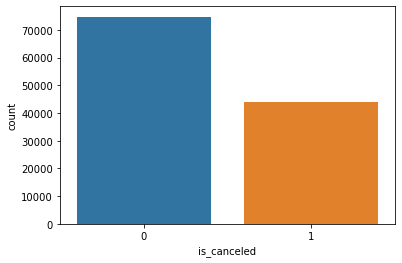

In [26]:
sns.countplot(data=df,x='is_canceled')

In [27]:
print('Total of canceled booking:',(df['is_canceled'].value_counts()[1]))
print('Percentage of canceled booking:',round(df['is_canceled'].value_counts()[1]/df['is_canceled'].value_counts().sum(),5)*100,'%')

Total of canceled booking: 44157
Percentage of canceled booking: 37.137 %


Based on the graph above, it seems that the dataset is **imbalanced**. Because of the amount of canceled order is lower than the check-in order, my initial guess to handle this problem is using **undersampling** method, such as Near-Miss or Random Undersampling.

In [28]:
df.groupby('hotel')['is_canceled'].value_counts()

hotel         is_canceled
City Hotel    0              46226
              1              33080
Resort Hotel  0              28519
              1              11077
Name: is_canceled, dtype: int64

In [29]:
pd.crosstab(df['is_canceled'],df['hotel'],normalize='columns')

hotel,City Hotel,Resort Hotel
is_canceled,,
0,0.582881,0.72025
1,0.417119,0.27975


<AxesSubplot:xlabel='is_canceled', ylabel='count'>

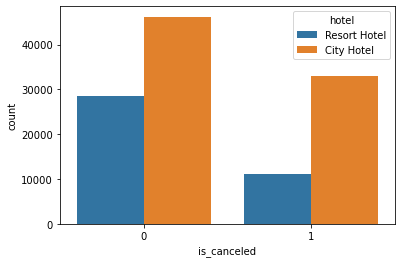

In [30]:
sns.countplot(data=df,x='is_canceled',hue='hotel')

The amount of canceled booking at city hotel is higher compared to resort hotel.

## Which countries were planning to visit the hotels?

In [31]:
df['country'].nunique()

177

Since the dataset consists of a lot of countries. I will present top 15 countries that were planning to visit the hotels.

In [32]:
df['country'].value_counts()[:20]

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
USA     2097
CHE     1730
CN      1279
AUT     1263
SWE     1024
CHN      999
POL      919
ISR      669
RUS      632
NOR      607
Name: country, dtype: int64

<AxesSubplot:xlabel='country', ylabel='count'>

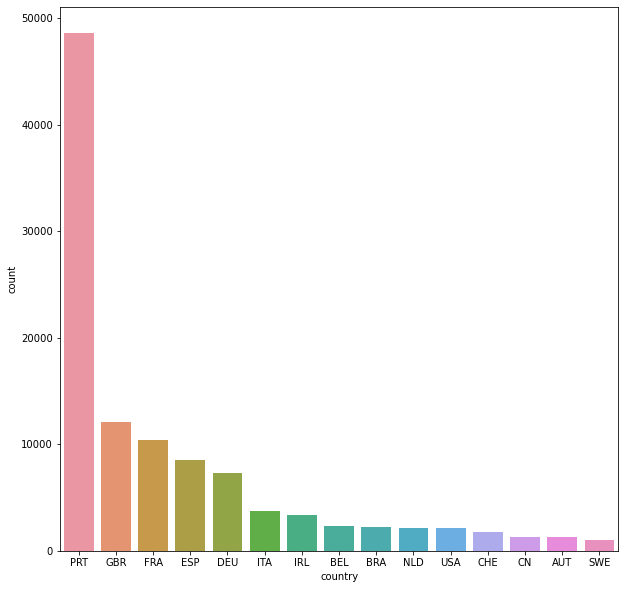

In [33]:
plt.figure(figsize=(10,10))
sns.countplot(x="country", data=df,
              order=df.country.value_counts().iloc[:15].index)

## Which countries have the most canceled booking?

<AxesSubplot:xlabel='country', ylabel='is_canceled'>

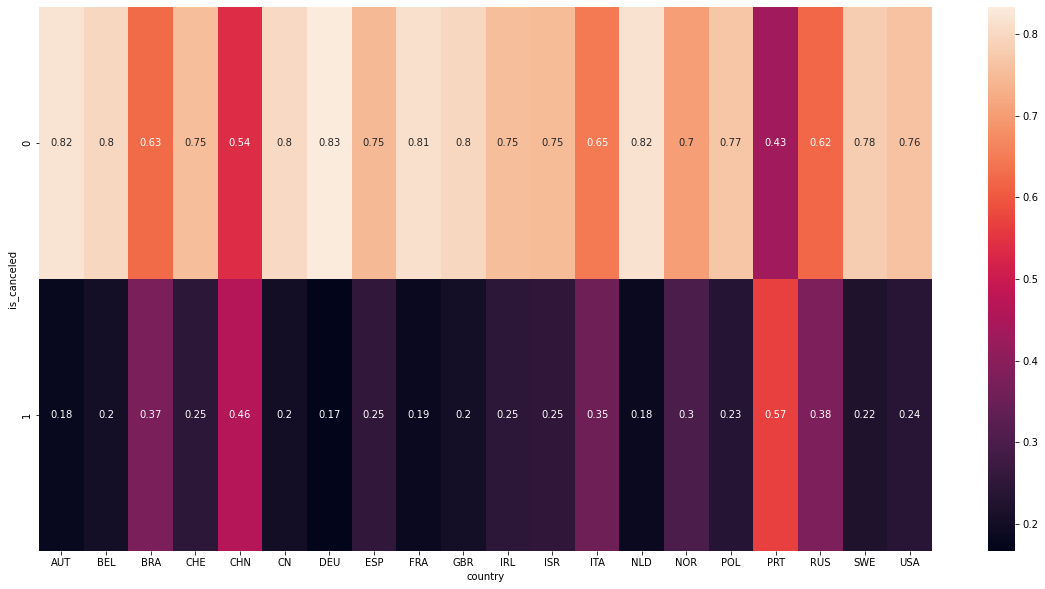

In [34]:
plt.figure(figsize=(20,10))
sns.heatmap(pd.crosstab(df['is_canceled'],df[df['country'].isin(list(df.country.value_counts().iloc[:20].index))]['country'],normalize='columns'), annot=True)

Portugal has the most canceled booking, followed by China, Russia, Brazil, and Italy.

## Is deposit type affecting the canceled booking?

<AxesSubplot:xlabel='deposit_type', ylabel='count'>

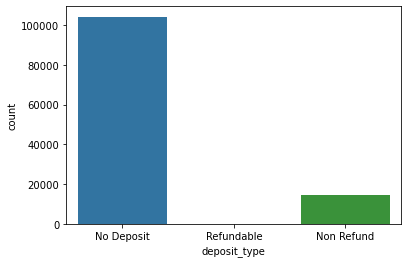

In [35]:
sns.countplot(data=df,x='deposit_type')

In [36]:
df['deposit_type'].value_counts()

No Deposit    104167
Non Refund     14573
Refundable       162
Name: deposit_type, dtype: int64

<AxesSubplot:xlabel='deposit_type', ylabel='is_canceled'>

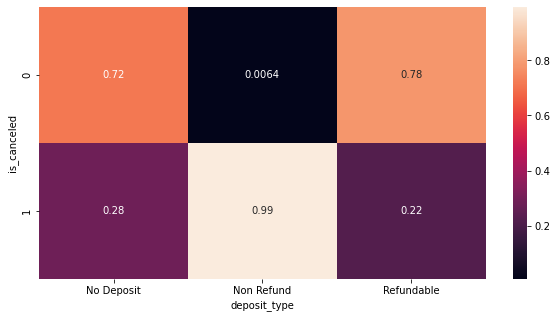

In [37]:
plt.figure(figsize=(10,5))
sns.heatmap(pd.crosstab(df['is_canceled'],df['deposit_type'],normalize='columns'), annot=True)

Based on its proportion, there were no difference between no deposit and refundable in booking status, while it is really weird that most of the non refund type were resulting in canceled booking.

In [38]:
df[df['deposit_type']=='Non Refund'].groupby('hotel')['is_canceled'].value_counts()

hotel         is_canceled
City Hotel    1              12830
              0                 24
Resort Hotel  1               1650
              0                 69
Name: is_canceled, dtype: int64

<div style="text-align: justify">
My best guess is that since this kind of deposit includes a full value of the total cost of stay and it is also labeled as non-refund, it is the most risky of all deposit types. Thus, not surprisingly that most of the customers canceled their booking, before submitting the deposit.
</div>

## Which room type is the most popular?

In [39]:
df['reserved_room_type'].value_counts()

A    85601
D    19173
E     6497
F     2890
G     2083
B     1118
C      931
H      601
L        6
P        2
Name: reserved_room_type, dtype: int64

<AxesSubplot:xlabel='reserved_room_type', ylabel='count'>

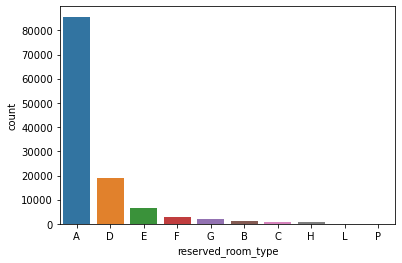

In [40]:
sns.countplot(data=df,x='reserved_room_type',order=df.reserved_room_type.value_counts().index)

## Which room type booking are resulting in cancel?

<AxesSubplot:xlabel='reserved_room_type', ylabel='is_canceled'>

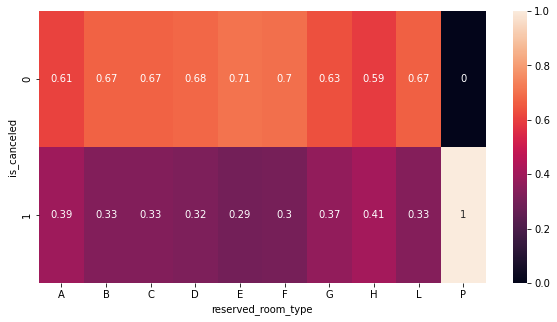

In [41]:
plt.figure(figsize=(10,5))
sns.heatmap(pd.crosstab(df['is_canceled'],df['reserved_room_type'],normalize='columns'), annot=True)

My best guess here is that P is the most expensive one because of low booking count and that all of the booking were canceled. Based on its cancel, not cancel proportions, room H has the most count, followed by A and G.

## Others

### Meal

<AxesSubplot:xlabel='meal', ylabel='count'>

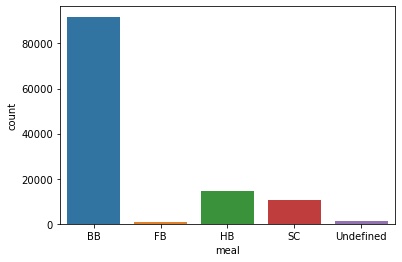

In [42]:
sns.countplot(data=df,x='meal')

Based on column description, I think it's best to combine SC and undefined groups into one.

### Market Segment

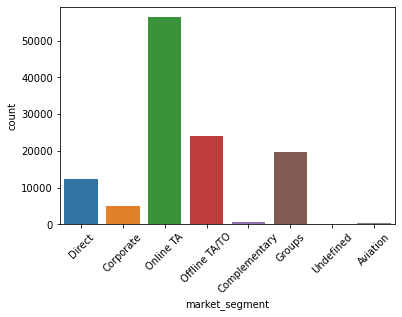

In [43]:
sns.countplot(data=df,x='market_segment')
plt.xticks(rotation=45)
plt.show()

In [44]:
df[df['market_segment']=='Undefined'][['distribution_channel','market_segment']]

,distribution_channel,market_segment
40600,Undefined,Undefined
40679,Undefined,Undefined


I think we can put aviation into corporate, also deleting the undefined data of market segment.

### Distribution Channel

<AxesSubplot:xlabel='distribution_channel', ylabel='count'>

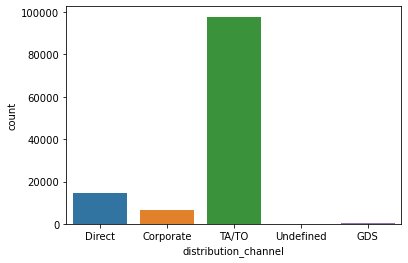

In [45]:
sns.countplot(data=df,x='distribution_channel')

In [46]:
df[df['distribution_channel']=='Undefined'][['distribution_channel','market_segment']]

,distribution_channel,market_segment
14594,Undefined,Direct
40600,Undefined,Undefined
40667,Undefined,Direct
40679,Undefined,Undefined
41160,Undefined,Online TA


GDS should be inputted into TA/TO. We can match the distribution channel with its market segment.

### Customer Type

<AxesSubplot:xlabel='customer_type', ylabel='count'>

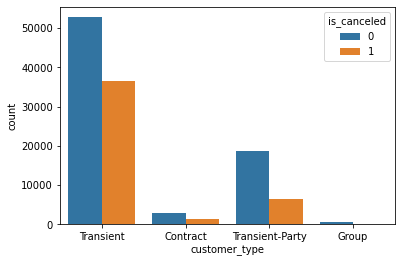

In [47]:
sns.countplot(data=df,x='customer_type',hue='is_canceled')

<AxesSubplot:xlabel='customer_type', ylabel='is_canceled'>

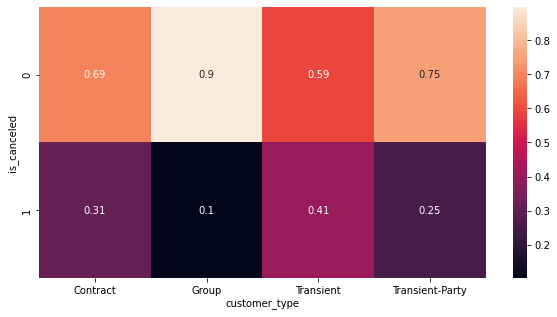

In [48]:
plt.figure(figsize=(10,5))
sns.heatmap(pd.crosstab(df['is_canceled'],df['customer_type'],normalize='columns'), annot=True)

Most of the group customer type were resulting in check-in. While transient class has the most canceled booking.

### Repeated Guest and Number of Previous Cancel/Not Cancel

In [49]:
df['is_repeated_guest'].value_counts()

0    115096
1      3806
Name: is_repeated_guest, dtype: int64

In [50]:
df[(df['is_repeated_guest']==0)&(df['previous_bookings_not_canceled']!=0)][['is_canceled','previous_cancellations','previous_bookings_not_canceled']].sort_values('previous_cancellations',ascending=False)

,is_canceled,previous_cancellations,previous_bookings_not_canceled
80059,1,11,25
80060,1,11,25
80061,1,11,25
80062,1,11,25
80058,1,11,25
...,...,...,...
14280,0,0,4
14279,0,0,3
14278,0,0,2
14277,0,0,1


These data should be repeated guest (1).

In [51]:
index=df[(df['is_repeated_guest']==0)&(df['previous_bookings_not_canceled']!=0)].index
df.loc[index,'is_repeated_guest']=1

In [52]:
df[(df['is_repeated_guest']==1)&((df['previous_bookings_not_canceled']==0)&(df['previous_cancellations']==0))][['is_canceled','previous_cancellations','previous_bookings_not_canceled']].sort_values('previous_cancellations',ascending=False)

,is_canceled,previous_cancellations,previous_bookings_not_canceled
15446,0,0,0
85055,0,0,0
83351,0,0,0
83353,0,0,0
83355,0,0,0
...,...,...,...
30668,0,0,0
30756,0,0,0
30904,0,0,0
31065,0,0,0


These data should be not repeated guest (0).

In [53]:
index=df[(df['is_repeated_guest']==1)&((df['previous_bookings_not_canceled']==0)&(df['previous_cancellations']==0))].index
df.loc[index,'is_repeated_guest']=0

# Feature Engineering and Final Data Wrangling

Based on informations from EDA, I will do the following:

## Combining SC and Undefined in Meal

Let's put them together in 'No Meal' category.

In [54]:
index1=df[df['meal']=='SC'].index
index2=df[df['meal']=='Undefined'].index
df.loc[index1,'meal']='No Meal'
df.loc[index2,'meal']='No Meal'

In [55]:
df['meal'].value_counts()

BB         91867
HB         14434
No Meal    11803
FB           798
Name: meal, dtype: int64

## Deleting Undefined Data in Market Segment

In [56]:
index=df[df['market_segment']=='Undefined'].index
df.drop(index,inplace=True)

## Filling Undefined Data in Distribution Channel

In [57]:
df.reset_index(drop=True,inplace=True)

In [58]:
df[df['distribution_channel']=='Undefined'][['distribution_channel','market_segment']]

,distribution_channel,market_segment
14185,Undefined,Direct
40202,Undefined,Direct
40694,Undefined,Online TA


In [59]:
df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [60]:
df.loc[14185,'distribution_channel']='Direct'
df.loc[40202,'distribution_channel']='Direct'
df.loc[40694,'distribution_channel']='TA/TO'

## New Feature: Region, Distance

We will make Region that will classify the country, somehow will indicating distance to Portugal.

In [63]:
import mysql.connector
# Creating connection
mydb=mysql.connector.connect(
    host='localhost',
    user='root',
    passwd='********',
    database='world')

mycursor=mydb.cursor()
# Create access to database
query='show tables;'
# Query
mycursor.execute(query)
# Execute query
result=mycursor.fetchall()
# Save result
dfsql=pd.DataFrame(result,columns=mycursor.column_names)
dfsql.head()

,Tables_in_world
0,city
1,country
2,countrylanguage
3,countrypop


In [64]:
# Creating Function
mycursor=mydb.cursor()
def sql(query):
    mycursor.execute(query)
    result=mycursor.fetchall()
    dfsql=pd.DataFrame(result,columns=mycursor.column_names)
    return dfsql

In [65]:
country=sql('''
SELECT Code, Region FROM country
WHERE Region = 'Western Africa' OR Region = 'Northern Africa' OR
Continent = 'Europe'
''')
country.head()

,Code,Region
0,ALB,Southern Europe
1,AND,Southern Europe
2,AUT,Western Europe
3,BEL,Western Europe
4,BEN,Western Africa


In [66]:
df=pd.merge(df,country,left_on='country',right_on='Code',how='left')

In [67]:
df.drop(columns=['Code'],inplace=True)

In [68]:
index=df[df['Region'].isna()].index
df.loc[index,'Region']='Others'

## Final Dataset

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118900 entries, 0 to 118899
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     118900 non-null  int64  
 1   hotel                           118900 non-null  object 
 2   adults                          118900 non-null  int64  
 3   babies                          118900 non-null  int64  
 4   children                        118900 non-null  float64
 5   country                         118900 non-null  object 
 6   is_repeated_guest               118900 non-null  int64  
 7   meal                            118900 non-null  object 
 8   reserved_room_type              118900 non-null  object 
 9   deposit_type                    118900 non-null  object 
 10  required_car_parking_spaces     118900 non-null  int64  
 11  total_of_special_requests       118900 non-null  int64  
 12  market_segment  

# Splitting Data

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
df.columns

Index(['is_canceled', 'hotel', 'adults', 'babies', 'children', 'country',
       'is_repeated_guest', 'meal', 'reserved_room_type', 'deposit_type',
       'required_car_parking_spaces', 'total_of_special_requests',
       'market_segment', 'distribution_channel', 'customer_type',
       'previous_bookings_not_canceled', 'previous_cancellations',
       'booking_changes', 'days_in_waiting_list', 'Region'],
      dtype='object')

In [72]:
x=df.drop(columns=['is_canceled','hotel'])
y=df['is_canceled']

In [73]:
x_train, x_test, y_train, y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=2020)

# Preprocessing

In [74]:
from sklearn.compose import ColumnTransformer

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler

In [75]:
df.describe()

,is_canceled,adults,babies,children,is_repeated_guest,required_car_parking_spaces,total_of_special_requests,previous_bookings_not_canceled,previous_cancellations,booking_changes,days_in_waiting_list
count,118900.000000,118900.000000,118900.000000,118900.000000,118900.000000,118900.000000,118900.000000,118900.000000,118900.000000,118900.000000,118900.000000
mean,0.371362,1.865004,0.007813,0.103759,0.031783,0.061884,0.571690,0.131632,0.087140,0.221177,2.330715
std,0.483171,0.568640,0.093513,0.398495,0.175423,0.244170,0.792673,1.484660,0.845862,0.652780,17.630307
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,55.000000,10.000000,10.000000,1.000000,8.000000,5.000000,72.000000,26.000000,21.000000,391.000000


Due to outliers in datasets, we will use **robust scaling** for several features: adults, babies, children, booking_changes, days_in_waiting_list, previous_bookings_not_canceled, previous_cancellations

In [76]:
df.describe(include='object')

,hotel,country,meal,reserved_room_type,deposit_type,market_segment,distribution_channel,customer_type,Region
count,118900,118900,118900,118900,118900,118900,118900,118900,118900
unique,2,177,4,10,3,7,4,4,9
top,City Hotel,PRT,BB,A,No Deposit,Online TA,TA/TO,Transient,Southern Europe
freq,79304,48588,91865,85601,104165,56403,97731,89174,61286


Based of its number of unique values, we will do the following:
1. **Binary encoding**: meal, country, market_segment, reserved_room_type, Region
2. **One hot encoding**: distribution_channel, deposit_type, customer_type

In [108]:
transformer = ColumnTransformer([
    ('one hot',OneHotEncoder(drop='first'),['distribution_channel','deposit_type','customer_type']),
    ('binary', ce.BinaryEncoder(), ['meal','country','market_segment','reserved_room_type','Region']),
    ('robust', RobustScaler(), ['adults','babies','children','booking_changes','days_in_waiting_list','previous_bookings_not_canceled','previous_cancellations'])
], remainder = 'passthrough')

# Evaluation Metric

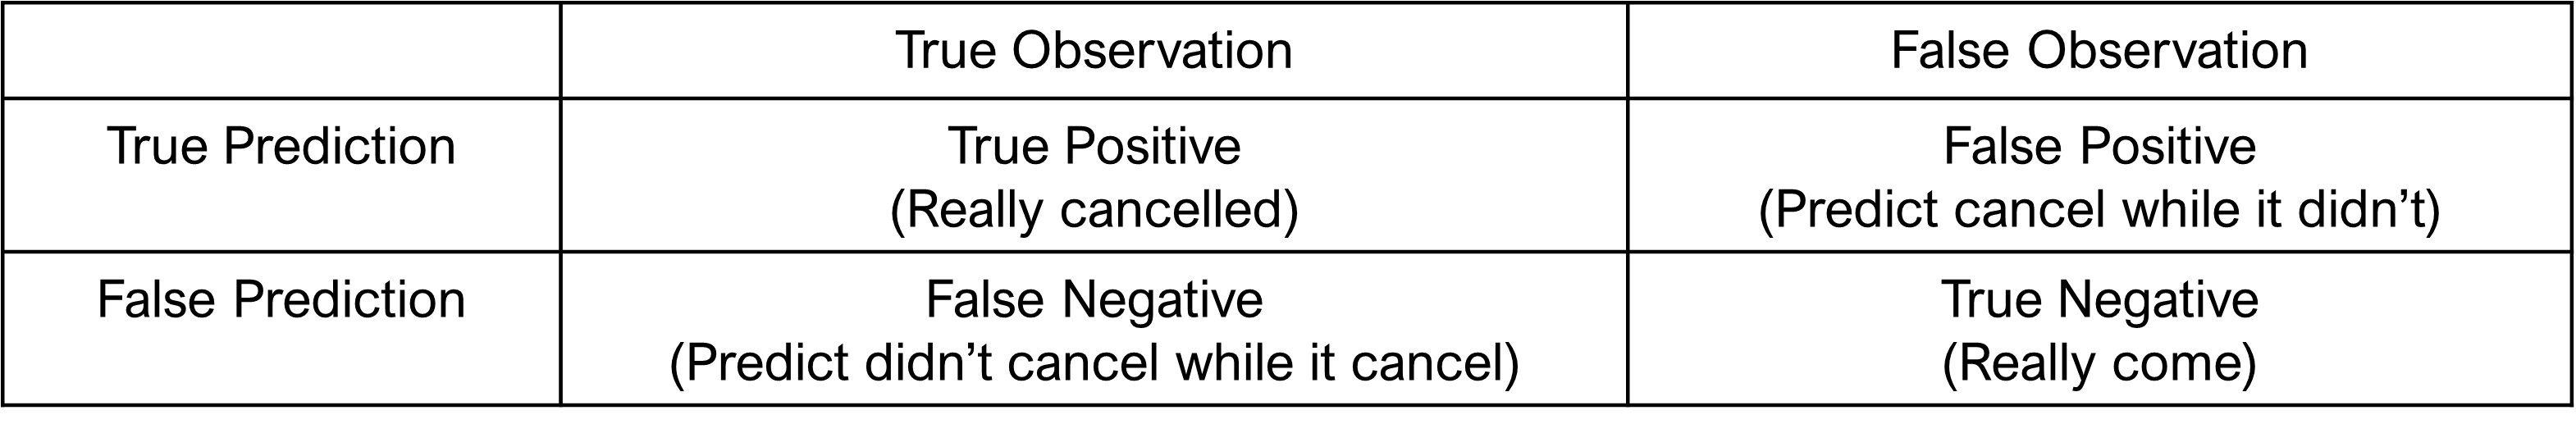

<div style="text-align: justify">
To select the appropriate evaluation metric, we need to understand about the risk of false negative and false positive in our prediction case. In short term point-of-view (POV), false negative of booking cancellation prediction is more likely resulting in profit-loss because of unnecessary preparation of the hotel towards non-existent customer. But in the long term POV, failing to prepare for the customer's arrival also will reduce our customer's experience, resulting in unseen profit/opportunity-loss in the future (false positive). So, balancing false positive and false negative (<strong>F1 score</strong>) is necessity for this prediction model building.
</div>

# Method Selection

To build the machine learning model, we need to select the best model as our base learner.

## Models

For this project, we will use logistic regression as our basic binary classification model, KNN as instance-based machine learning model, Forest as bagging ensemble method, and XGBoost as boosting ensemble method.

In [109]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier,RandomForestClassifier
from xgboost.sklearn import XGBClassifier

In [110]:
model_logreg = LogisticRegression(solver='liblinear',random_state=10)
model_knn= KNeighborsClassifier()
model_xgbc= XGBClassifier(random_state=10)
model_forest= RandomForestClassifier(random_state=10)

## Random Undersampler

For simplicity, we will random undersampling method to reduce the amount of majority class, which is not canceled data.

In [111]:
from imblearn.under_sampling import RandomUnderSampler

In [112]:
rus = RandomUnderSampler(random_state=10)

## Cross-Validation 

In [113]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline

In [114]:
estimator=Pipeline([
    ('preprocess',transformer),
    ('resampling',rus),
    ('model',model_xgbc)
])

In [115]:
hyperparam_space={
    'model':[model_logreg,model_xgbc,model_knn,model_forest]
}

In [116]:
skfold=StratifiedKFold(n_splits=2)
grid=GridSearchCV(
    estimator,
    param_grid=hyperparam_space,
    cv=skfold,
    scoring='f1',
    n_jobs=-1
)

In [117]:
grid.fit(x_train,y_train)

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:40:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one '
                                                                         'hot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['distribution_channel',
                                                                          'deposit_type',
                                                                          'customer_type']),
                                                                        ('binary',
                                                                         BinaryEncoder(),
                                                                    

In [118]:
pd.DataFrame(grid.cv_results_)[['params','mean_test_score','std_test_score','rank_test_score']]

,params,mean_test_score,std_test_score,rank_test_score
0,"{'model': LogisticRegression(random_state=10, ...",0.704413,0.002203,4
1,"{'model': XGBClassifier(base_score=None, boost...",0.754151,0.002453,1
2,{'model': KNeighborsClassifier()},0.710875,0.000398,3
3,{'model': RandomForestClassifier(random_state=...,0.747693,0.001389,2


XGBoost is the best model with best F1 score and comparable, low standard deviation toward other models.

# Base Model

In [119]:
estimator = Pipeline([
        ('preprocessing', transformer),
        ('resampling', rus),
        ('model', model_xgbc)])

estimator.fit(x_train,y_train)

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:41:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['distribution_channel',
                                                   'deposit_type',
                                                   'customer_type']),
                                                 ('binary', BinaryEncoder(),
                                                  ['meal', 'country',
                                                   'market_segment',
                                                   'reserved_room_type',
                                                   'Region']),
                                                 ('robust', RobustScaler(),
                                                  ['adults', 'babies',
                                                   'chi

In [120]:
y_pred=estimator.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84     14949
           1       0.71      0.81      0.76      8831

    accuracy                           0.81     23780
   macro avg       0.79      0.81      0.80     23780
weighted avg       0.81      0.81      0.81     23780



Can we improve the model performance?

# Hyperparameter Tuning

In [121]:
estimator=Pipeline([
    ('preprocess',transformer),
    ('resampling',rus),
    ('model',model_xgbc)
])

In [122]:
estimator.get_params()

{'memory': None,
 'steps': [('preprocess',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('one hot', OneHotEncoder(drop='first'),
                                    ['distribution_channel', 'deposit_type',
                                     'customer_type']),
                                   ('binary', BinaryEncoder(),
                                    ['meal', 'country', 'market_segment',
                                     'reserved_room_type', 'Region']),
                                   ('robust', RobustScaler(),
                                    ['adults', 'babies', 'children',
                                     'booking_changes', 'days_in_waiting_list',
                                     'previous_bookings_not_canceled',
                                     'previous_cancellations'])])),
  ('resampling', RandomUnderSampler(random_state=10)),
  ('model',
   XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
     

In [123]:
hyperparam_space={
    'model__max_depth':[5,10,15,20,25],
    'model__n_estimators':[60,80,100,120,140],
    'model__learning_rate':[0.001,0.01,0.1,0.2,0.3],
    'model__eval_metric':['error','logloss']
}

In [124]:
skfold=StratifiedKFold(n_splits=2)
grid_search=GridSearchCV(
    estimator,
    param_grid=hyperparam_space,
    cv=skfold,
    scoring='f1',
    n_jobs=-1
)

In [125]:
grid_search.fit(x_train,y_train)

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one '
                                                                         'hot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['distribution_channel',
                                                                          'deposit_type',
                                                                          'customer_type']),
                                                                        ('binary',
                                                                         BinaryEncoder(),
                                                                    

In [141]:
pd.set_option('display.max_colwidth', None)
pd.DataFrame(grid_search.cv_results_)[['params','mean_test_score','std_test_score','rank_test_score']].sort_values('rank_test_score',ascending=True).head()

,params,mean_test_score,std_test_score,rank_test_score
58,"{'model__eval_metric': 'error', 'model__learning_rate': 0.1, 'model__max_depth': 10, 'model__n_estimators': 120}",0.756834,0.002681,1
183,"{'model__eval_metric': 'logloss', 'model__learning_rate': 0.1, 'model__max_depth': 10, 'model__n_estimators': 120}",0.756834,0.002681,1
59,"{'model__eval_metric': 'error', 'model__learning_rate': 0.1, 'model__max_depth': 10, 'model__n_estimators': 140}",0.756712,0.002272,3
184,"{'model__eval_metric': 'logloss', 'model__learning_rate': 0.1, 'model__max_depth': 10, 'model__n_estimators': 140}",0.756712,0.002272,3
208,"{'model__eval_metric': 'logloss', 'model__learning_rate': 0.2, 'model__max_depth': 10, 'model__n_estimators': 120}",0.756151,0.001380,5


In [126]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.7568341668697502
{'model__eval_metric': 'error', 'model__learning_rate': 0.1, 'model__max_depth': 10, 'model__n_estimators': 120}


# Test Dataset

In [153]:
best_model=grid_search.best_estimator_
best_model.fit(x_train,y_train)

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['distribution_channel',
                                                   'deposit_type',
                                                   'customer_type']),
                                                 ('binary', BinaryEncoder(),
                                                  ['meal', 'country',
                                                   'market_segment',
                                                   'reserved_room_type',
                                                   'Region']),
                                                 ('robust', RobustScaler(),
                                                  ['adults', 'babies',
                                                   'childr

In [154]:
y_pred2=best_model.predict(x_test)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84     14949
           1       0.71      0.81      0.76      8831

    accuracy                           0.81     23780
   macro avg       0.79      0.81      0.80     23780
weighted avg       0.82      0.81      0.81     23780



Hyperparameter tuning didn't improve the model performance.

# Features Importances

In [157]:
features=list(transformer.transformers_[0][1].get_feature_names_out())+transformer.transformers_[1][1].get_feature_names()+['adults', 'babies', 'children',
                                     'booking_changes', 'days_in_waiting_list','previous_bookings_not_canceled',
                                     'previous_cancellations','is_repeated_guest','required_car_parking_spaces','total_of_special_requests']

In [164]:
pd.DataFrame({'imp':best_model.steps[2][1].feature_importances_},index=features).sort_values('imp', ascending=False)

,imp
deposit_type_Non Refund,0.625349
required_car_parking_spaces,0.132051
Region_3,0.040255
market_segment_2,0.037412
previous_cancellations,0.028197
market_segment_0,0.022687
country_5,0.012876
customer_type_Transient,0.012249
total_of_special_requests,0.011553
previous_bookings_not_canceled,0.006096


# Features Selection

Compared to the previous model with less data, this result is lesser to it. My best guess is that we included too many features. Let's use recursive feature selection method.

In [165]:
from sklearn.feature_selection import RFE

In [206]:
rfe = RFE(estimator=best_model.steps[2][1], n_features_to_select=30)

In [207]:
estimator=Pipeline([
    ('preprocess',transformer),
    ('resampling',rus),
    ('selection',rfe),
    ('model',best_model.steps[2][1])
])

In [208]:
estimator.fit(x_train,y_train)

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is depre

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['distribution_channel',
                                                   'deposit_type',
                                                   'customer_type']),
                                                 ('binary', BinaryEncoder(),
                                                  ['meal', 'country',
                                                   'market_segment',
                                                   'reserved_room_type',
                                                   'Region']),
                                                 ('robust', RobustScaler(),
                                                  ['adults', 'babies',
                                                   'childr

In [209]:
y_pred3=estimator.predict(x_test)
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84     14949
           1       0.71      0.81      0.75      8831

    accuracy                           0.81     23780
   macro avg       0.79      0.81      0.80     23780
weighted avg       0.81      0.81      0.81     23780



Reducing the number of features lead to reduced F1-score value. Thus, the reduced F1-score from the previous project with 5000 data was not caused by increase in features. But, that didn't mean that our model is worse than the previous because our standard deviation is lower compared to previous model. The previous model failed to capture the whole dataset, thus the result are biased.